In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# Pour que les graphiques s'affichent directement dans le notebook
%matplotlib inline

# Paramétrage de Seaborn pour des graphiques agréables
sns.set(style="whitegrid")

#%% Chargement et prétraitement des données

# Chemin vers le fichier CSV
data_path = '/Users/alexlssrd/Desktop/HACKATHON/final_data/waiting_times.csv'

# Lecture du fichier CSV
df = pd.read_csv(data_path)

# Affichage des premières lignes pour un premier aperçu
print("Aperçu des données brutes :")
print(df.head())

# Nettoyage des noms de colonnes :
# - Suppression des espaces en début/fin
# - Remplacement des espaces internes par des underscores
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)
print("\nNouveaux noms de colonnes :")
print(df.columns.tolist())

# Conversion des colonnes de date/heure
# - WORK_DATE : format 'YYYY-MM-DD'
# - DEB_TIME et FIN_TIME : format avec date et heure (exemple : '2018-01-01 21:00:00.000')
df['WORK_DATE'] = pd.to_datetime(df['WORK_DATE'], format='%Y-%m-%d', errors='coerce')
df['DEB_TIME']  = pd.to_datetime(df['DEB_TIME'], errors='coerce')
df['FIN_TIME']  = pd.to_datetime(df['FIN_TIME'], errors='coerce')

# Affichage des types de données après conversion
print("\nTypes de données après conversion:")
print(df.dtypes)

# Pour certaines analyses, il peut être utile de conserver l'heure de début sous forme numérique
# (extraite de la colonne DEB_TIME ou directement de DEB_TIME_HOUR si déjà présente)
# Par exemple, on s'assure que DEB_TIME_HOUR est de type entier :
if 'DEB_TIME_HOUR' in df.columns:
    df['DEB_TIME_HOUR'] = pd.to_numeric(df['DEB_TIME_HOUR'], errors='coerce').astype('Int64')

#%% Graphique 1 : Nombre de sessions par jour


# On regroupe par WORK_DATE et on compte le nombre de lignes (sessions) par date
daily_counts = df.groupby('WORK_DATE').size().reset_index(name='ride_count')




Aperçu des données brutes :
    WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0  2018-01-01  2018-01-01 21:00:00.000             21   
1  2018-01-01  2018-01-01 19:30:00.000             19   
2  2018-01-01  2018-01-01 22:30:00.000             22   
3  2018-01-01  2018-01-01 12:45:00.000             12   
4  2018-01-01  2018-01-01 17:00:00.000             17   

                  FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  \
0  2018-01-01 21:15:00.000           Roller Coaster              0       2.0   
1  2018-01-01 19:45:00.000              Bumper Cars              5      18.0   
2  2018-01-01 22:45:00.000              Rapids Ride              0       1.0   
3  2018-01-01 13:00:00.000              Crazy Dance              5       1.0   
4  2018-01-01 17:15:00.000                   Skyway              5      15.0   

   GUEST_CARRIED  CAPACITY  ADJUST_CAPACITY  OPEN_TIME  UP_TIME  DOWNTIME  \
0            0.0     0.000             0.00          0        0        

Colonnes lues dans attendance.csv : ['USAGE_DATE', 'FACILITY_NAME', 'attendance']

Aperçu des données d'attendance brutes :
   USAGE_DATE       FACILITY_NAME attendance
0  2018-06-01  PortAventura World      46804
1  2018-06-01      Tivoli Gardens      20420
2  2018-06-02  PortAventura World      57940
3  2018-06-02      Tivoli Gardens      29110
4  2018-06-03  PortAventura World      44365

Aperçu des données d'attendance après nettoyage :
  USAGE_DATE       FACILITY_NAME  attendance
0 2018-06-01  PortAventura World       46804
1 2018-06-01      Tivoli Gardens       20420
2 2018-06-02  PortAventura World       57940
3 2018-06-02      Tivoli Gardens       29110
4 2018-06-03  PortAventura World       44365


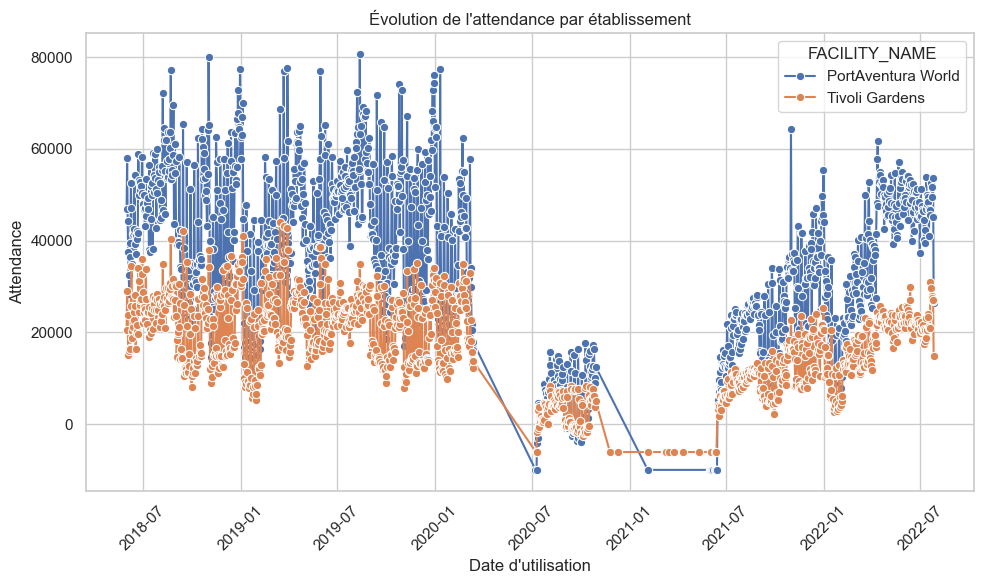

In [29]:
%matplotlib inline


sns.set(style="whitegrid", context="notebook")

# =============================================================================
# Partie 1 : Lecture et traitement du fichier attendance.csv
# =============================================================================

# Chemin vers le fichier attendance.csv
attendance_path = '/Users/alexlssrd/Desktop/HACKATHON/final_data/attendance.csv'

# Méthode manuelle pour lire le fichier et découper correctement les colonnes
with open(attendance_path, 'r', encoding='utf-8') as f:
    # Lire toutes les lignes du fichier
    lines = f.read().splitlines()

# Vérifier que le fichier n'est pas vide
if not lines:
    raise ValueError("Le fichier attendance.csv est vide.")

# La première ligne contient l'en-tête, que l'on découpe à l'aide de la virgule
header = [col.strip() for col in lines[0].split(',')]
# On découpe ensuite chaque ligne de données de la même manière
data_rows = [row.split(',') for row in lines[1:]]

# Création du DataFrame à partir de ces données
df_att = pd.DataFrame(data_rows, columns=header)

# Vérification des colonnes lues
print("Colonnes lues dans attendance.csv :", df_att.columns.tolist())
print("\nAperçu des données d'attendance brutes :")
print(df_att.head())

# Nettoyage et conversion des colonnes :
# - Conversion de USAGE_DATE en datetime
# - Suppression des espaces superflus dans FACILITY_NAME
# - Conversion de attendance en numérique
df_att['USAGE_DATE'] = pd.to_datetime(df_att['USAGE_DATE'].str.strip(), format='%Y-%m-%d', errors='coerce')
df_att['FACILITY_NAME'] = df_att['FACILITY_NAME'].str.strip()
df_att['attendance'] = pd.to_numeric(df_att['attendance'].str.strip(), errors='coerce')

print("\nAperçu des données d'attendance après nettoyage :")
print(df_att.head())

# =============================================================================
# Graphique 1 : Évolution de l'attendance par établissement dans le temps
# =============================================================================
plt.figure(figsize=(10,6))
sns.lineplot(data=df_att, x='USAGE_DATE', y='attendance', hue='FACILITY_NAME', marker='o')
plt.title("Évolution de l'attendance par établissement")
plt.xlabel("Date d'utilisation")
plt.ylabel("Attendance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Colonnes du DataFrame : ['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'weather_icon']


/var/folders/r9/wvl868zj0wzgh0ctfvgk0zdc0000gn/T/ipykernel_47959/661331915.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dt_iso'] = pd.to_datetime(df['dt_iso'], errors='coerce')



Aperçu de dt_iso converti :
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: dt_iso, dtype: datetime64[ns]

Aperçu du DataFrame avec encodage :
  dt_iso  feels_like  temp_min  temp_max  pressure  humidity  wind_speed  \
0    NaT        5.28      8.14      9.32      1006        71        5.57   
1    NaT        5.18      7.94      9.32      1006        73        5.02   
2    NaT        5.38      7.94      8.74      1006        76        4.56   
3    NaT        4.42      7.14      8.62      1006        78        4.56   
4    NaT        4.00      6.74      8.32      1007        79        4.40   

   clouds_all  weather_id weather_main weather_description weather_icon  \
0           8         800        Clear        sky is clear          01n   
1           6         800        Clear        sky is clear          01n   
2          14         801       Clouds          few clouds          02n   
3          39         802       Clouds    scattered clouds          03n   
4          52         803 

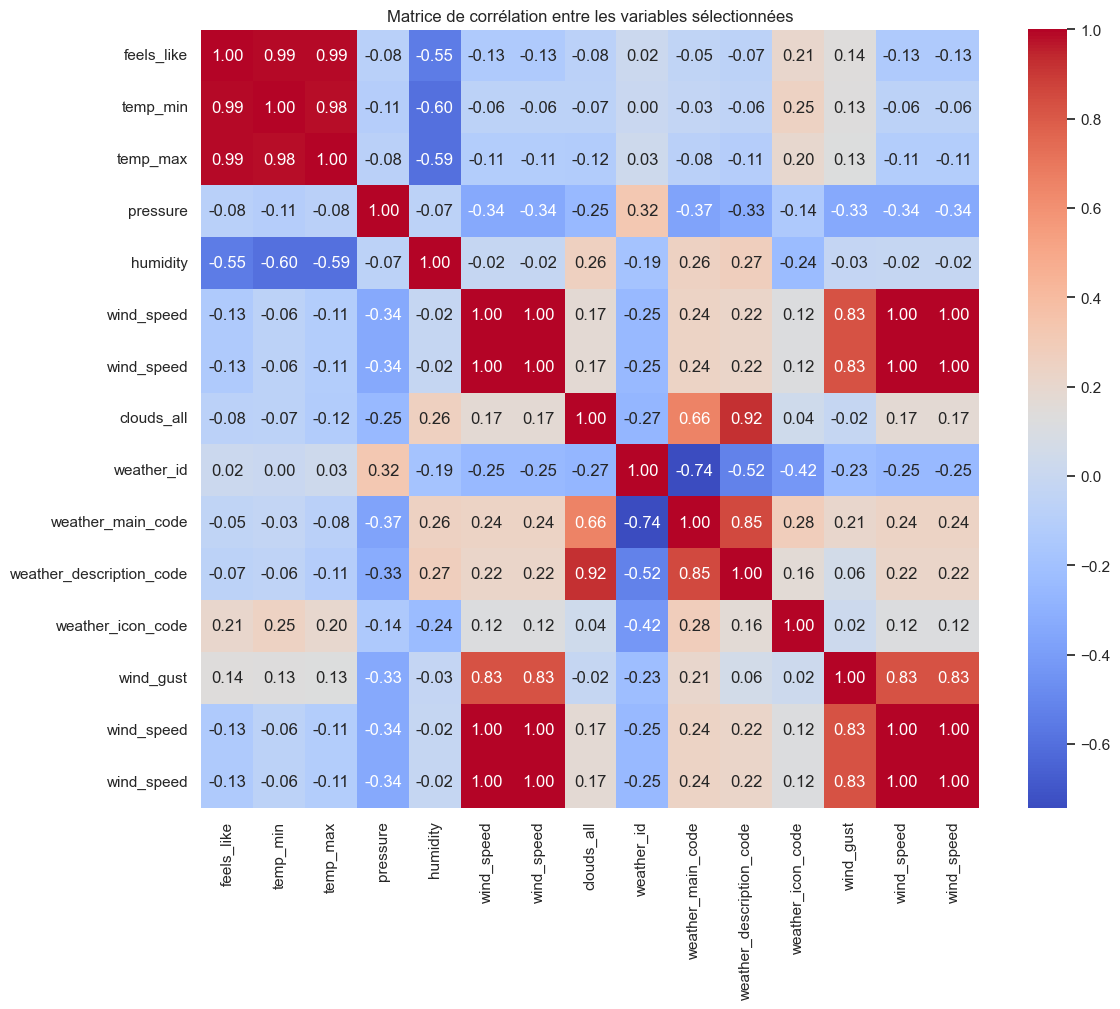

In [ ]:
# =============================
# 1. Chargement et préparation des données
# =============================

# Spécifiez le chemin de votre fichier CSV
file_path = "/Users/alexlssrd/Desktop/HACKATHON/final_data/weather_data.csv"

# Lire le CSV (modifiez le séparateur si nécessaire, ici on suppose une virgule)
df = pd.read_csv(file_path, sep=',')

# Nettoyer les noms de colonnes pour supprimer d'éventuels espaces superflus
df.rename(columns=lambda x: x.strip(), inplace=True)

# Affichage des colonnes pour vérifier que dt_iso est présent
print("Colonnes du DataFrame :", df.columns.tolist())

# Liste des colonnes qui nous intéressent
colonnes_interet = [
    'dt_iso',              # Date/heure (ex: "1999-01-01 00:00:00 +0000 UTC")
    'feels_like',          # Température ressentie
    'temp_min',            # Température minimale
    'temp_max',            # Température maximale
    'pressure',            # Pression atmosphérique
    'humidity',            # Humidité (%)
    'wind_speed',          # Vitesse du vent
    'clouds_all',          # Couverture nuageuse (%)
    'weather_id',          # ID météo
    'weather_main',        # Type de météo (ex: Clear, Clouds)
    'weather_description', # Description (ex: sky is clear, few clouds, …)
    'weather_icon', 
    'wind_gust',
    'wind_speed'        # Icône météo (ex: 01n, 04d, …)
]

# Vérifier que toutes les colonnes d'intérêt existent dans le DataFrame
for col in colonnes_interet:
    if col not in df.columns:
        print(f"Avertissement : la colonne '{col}' n'est pas présente dans le DataFrame.")

# Garder uniquement les colonnes d'intérêt
df = df[colonnes_interet]

# Conversion de la colonne dt_iso en type datetime
# Si le format est "1999-01-01 00:00:00 +0000 UTC", pd.to_datetime gère normalement le fuseau horaire
df['dt_iso'] = pd.to_datetime(df['dt_iso'], errors='coerce')
print("\nAperçu de dt_iso converti :")
print(df['dt_iso'].head())

# =============================
# 2. Encodage des variables catégorielles liées à la météo
# =============================

# On va convertir weather_main, weather_description et weather_icon en codes numériques
df['weather_main_code'] = pd.factorize(df['weather_main'])[0]
df['weather_description_code'] = pd.factorize(df['weather_description'])[0]
df['weather_icon_code'] = pd.factorize(df['weather_icon'])[0]

# Affichage d'un aperçu du DataFrame avec les nouvelles colonnes encodées
print("\nAperçu du DataFrame avec encodage :")
print(df.head())

# =============================
# 3. Matrice de corrélation et Pairplot
# =============================

# Sélection des colonnes numériques (on n'inclut pas dt_iso qui est de type datetime)
colonnes_numeriques = [
    'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
    'wind_speed', 'clouds_all', 'weather_id',
    'weather_main_code', 'weather_description_code', 'weather_icon_code','wind_gust','wind_speed'
]

# Calcul de la matrice de corrélation
corr_matrix = df[colonnes_numeriques].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation entre les variables sélectionnées")
plt.tight_layout()
plt.show()

In [ ]:
# Chargement des données
attendance = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/attendance.csv')
link_attraction_park = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/link_attraction_park.csv', sep=';')
entity_schedule = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/entity_schedule.csv')
waiting_times = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/waiting_times.csv')
weather_data = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/weather_data.csv')

# Prétraitement
attendance_aw = attendance.drop(attendance[attendance['FACILITY_NAME'] == 'Tivoli Gardens'].index).reset_index(drop=True)
attendance_aw = attendance_aw[attendance_aw['attendance'] >= 0]
attendance_aw.sort_values('USAGE_DATE', inplace=True)
attendance_aw.rename(columns={'attendance': 'ATTENDANCE', 'USAGE_DATE': 'WORK_DATE'}, inplace=True)
#DROP TIVOLI GARDENS ATTENDANCE = OK
attractions_aw = link_attraction_park.drop(link_attraction_park[link_attraction_park['PARK'] == 'Tivoli Gardens'].index).reset_index(drop=True)
#
entity_sched_aw = entity_schedule.drop(entity_schedule[entity_schedule['ENTITY_DESCRIPTION_SHORT'] == 'Tivoli Gardens'].index)
#DROP TIVOLI GARDENS AS A PARK IN ENTITY SCHEDULE
entity_sched_aw = entity_sched_aw[entity_sched_aw['ENTITY_DESCRIPTION_SHORT'].isin(attractions_aw['ATTRACTION'])].reset_index(drop=True)
#KEEPS ATTRACTIONS THAT WE FILTERED IN ATTRACTIONS_AW

waiting_times_aw = waiting_times[waiting_times['ENTITY_DESCRIPTION_SHORT'].isin(attractions_aw['ATTRACTION'])].reset_index(drop=True)
#FILTERS ATTRACTIONS BASED ON ATTRACTIONS_AW

waiting_times_aw['DEB_TIME'] = pd.to_datetime(waiting_times_aw['DEB_TIME'])
#NEED TO CHECK FOR THE TIME, TO PROPERLY MERGE DF

cols_todrop = ['timezone', 'city_name', 'lat', 'lon', 'weather_icon', 'dt', 'visibility', 'sea_level', 'grnd_level', 'snow_3h','temp_min','temp_max',
               'dew_point','pressure','wind_deg','wind_gust','clouds_all','weather_id','weather_main','weather_icon']
#COLS TO DROP NEED TO LAST CHECK
weather_data['dt_iso'] = weather_data['dt_iso'].str.replace('+0000 UTC', '', regex=False)
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'])
weather_data_aw = weather_data.drop(weather_data[weather_data['dt_iso'] < '2018-01-01'].index).drop(columns=cols_todrop).reset_index(drop=True)
#DATE PART TO CHECK
weather_data_aw = weather_data_aw.loc[weather_data_aw.index.repeat(4)].reset_index(drop=True)
if 'dt_iso' in weather_data_aw.columns:
    weather_data_aw['dt_iso'] += pd.to_timedelta((weather_data_aw.groupby('dt_iso').cumcount() * 15), unit='min')
weather_data_aw = weather_data_aw.rename(columns={'dt_iso': 'DEB_TIME'})
#TIME PART TO CHECK BUT SEEMS TO WORK

waitweather = pd.merge(waiting_times_aw, weather_data_aw, on='DEB_TIME', how='inner')
#MERGE

fermeture_days = entity_sched_aw[entity_sched_aw['REF_CLOSING_DESCRIPTION'].notnull()].reset_index(drop=True)
fermeture_days = fermeture_days.drop(columns=['ENTITY_TYPE', 'DEB_TIME', 'FIN_TIME', 'UPDATE_TIME'])

merged_df = pd.merge(
    waitweather,
    fermeture_days[['ENTITY_DESCRIPTION_SHORT', 'WORK_DATE', 'REF_CLOSING_DESCRIPTION']],
    on=['ENTITY_DESCRIPTION_SHORT', 'WORK_DATE'],
    how='left'
)

merged_df['REF_CLOSING_DESCRIPTION'] = merged_df['REF_CLOSING_DESCRIPTION'].fillna('Open')

dataset = pd.merge(merged_df, attendance_aw[['WORK_DATE', 'ATTENDANCE']], on=['WORK_DATE'], how='left')

w_nullcols = ['rain_1h', 'rain_3h', 'snow_1h']
dataset[w_nullcols] = dataset[w_nullcols].fillna(0)
dataset.dropna(inplace=True)

# Sauvegarde dans un fichier Excel avec différentes feuilles
output_csv_path = '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets.csv'
dataset.to_csv(output_csv_path, index=False)
print(f"CSV file '{output_csv_path}' generated successfully!")
    
print(f"Fichier '{output_csv_path}' généré avec succès !")

CSV file '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets.csv' generated successfully!
Fichier '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets.csv' généré avec succès !


In [47]:
data_set = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets.csv',sep = ',',encoding='utf-8')
data_set.sort_values(by='WORK_DATE', ascending=True, inplace=True)
data_set


,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,temp,feels_like,humidity,wind_speed,rain_1h,rain_3h,snow_1h,weather_description,REF_CLOSING_DESCRIPTION,ATTENDANCE
0,2018-06-01,2018-06-01 19:00:00,19,2018-06-01 19:15:00.000,Roller Coaster,15,2.0,50.0000,75.000,75.00,...,17.91,18.08,89,1.59,0.22,0.0,0.0,light rain,Open,46804.0
937,2018-06-01,2018-06-01 14:45:00,14,2018-06-01 15:00:00.000,Drop Tower,45,16.0,94.9999,140.250,140.25,...,20.34,20.57,82,3.26,3.04,0.0,0.0,moderate rain,Open,46804.0
936,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Water Ride,5,10.0,152.0000,247.001,224.50,...,18.55,18.73,87,2.95,0.00,0.0,0.0,overcast clouds,Open,46804.0
935,2018-06-01,2018-06-01 19:45:00,19,2018-06-01 20:00:00.000,Roller Coaster,0,2.0,0.0000,5.000,5.00,...,17.91,18.08,89,1.59,0.22,0.0,0.0,light rain,Open,46804.0
934,2018-06-01,2018-06-01 09:45:00,9,2018-06-01 10:00:00.000,Rapids Ride,5,2.0,0.0000,0.000,0.00,...,18.55,18.73,87,2.95,0.00,0.0,0.0,overcast clouds,Open,46804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603502,2022-07-26,2022-07-26 12:30:00,12,2022-07-26 12:45:00.000,Flying Coaster,30,25.0,502.0000,756.000,756.00,...,21.46,21.36,65,2.63,0.00,0.0,0.0,overcast clouds,Open,26391.0
1603501,2022-07-26,2022-07-26 18:00:00,18,2022-07-26 18:15:00.000,Oz Theatre,0,2.0,1.0000,387.500,387.50,...,21.85,21.66,60,3.72,0.00,0.0,0.0,overcast clouds,Open,26391.0
1603500,2022-07-26,2022-07-26 19:00:00,19,2022-07-26 19:15:00.000,Flying Coaster,15,25.0,555.0000,756.000,756.00,...,20.75,20.60,66,2.88,0.00,0.0,0.0,overcast clouds,Open,26391.0
1603498,2022-07-26,2022-07-26 09:15:00,9,2022-07-26 09:30:00.000,Giant Wheel,55,3.0,268.0000,503.750,302.25,...,19.72,19.76,77,3.08,0.00,0.0,0.0,broken clouds,Open,26391.0


In [ ]:
# -------------------------------
# 1. Load Your Final Dataset
# -------------------------------
output_csv_path = '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets.csv'
dataset = pd.read_csv(output_csv_path)

# Convert WORK_DATE and DEB_TIME to Timestamps (if not already)
dataset['WORK_DATE'] = pd.to_datetime(dataset['WORK_DATE'])
dataset['DEB_TIME'] = pd.to_datetime(dataset['DEB_TIME'])

# Create new columns for the flags and initialize them to 0
dataset['NIGHT_SHOW_FLAG'] = 0
dataset['PARADE_FLAG'] = 0

# -------------------------------
# 2. Load the parade/night show file
# -------------------------------
events_df = pd.read_excel('/Users/alexlssrd/Desktop/HACKATHON/final_data/parade_night_show.xlsx')

# Convert WORK_DATE from string (DD-MM-YYYY) to datetime
events_df['WORK_DATE'] = pd.to_datetime(events_df['WORK_DATE'], format='%d-%m-%Y')

# -------------------------------
# 3. Define a helper to round down to nearest quarter
# -------------------------------
def round_down_to_quarter(dt):
    """
    Rounds down a datetime 'dt' to the nearest quarter hour.
    For example, 17:40:00 -> 17:30:00, 20:07:00 -> 20:00:00.
    """
    new_min = (dt.minute // 15) * 15
    return dt.replace(minute=new_min, second=0, microsecond=0)

# -------------------------------
# 4. Loop over each event row and mark matching time slots in dataset
# -------------------------------
for idx, row in tqdm(events_df.iterrows(), total=len(events_df), desc="Processing events"):
    # Get the work date (date part only)
    work_date = row['WORK_DATE'].date()  # type: datetime.date
    
    # --- NIGHT_SHOW ---
    if pd.notna(row['NIGHT_SHOW']):
        try:
            # Parse the NIGHT_SHOW time string into a time object
            time_obj = pd.to_datetime(row['NIGHT_SHOW'], format='%H:%M:%S').time()
        except Exception as e:
            print(f"Error parsing NIGHT_SHOW time in row {idx}: {e}")
            continue

        # Combine work_date and time_obj into a full datetime
        event_start = pd.Timestamp.combine(work_date, time_obj)
        # Round down to the nearest quarter
        event_start = round_down_to_quarter(event_start)
        # Define the two slots that the 30-minute event covers
        slot1 = event_start
        slot2 = event_start + pd.Timedelta(minutes=15)
        
        # Mark these slots in the final dataset: match on both WORK_DATE and DEB_TIME
        dataset.loc[
            (dataset['WORK_DATE'] == pd.Timestamp(work_date)) & (dataset['DEB_TIME'] == slot1),
            'NIGHT_SHOW_FLAG'
        ] = 1
        dataset.loc[
            (dataset['WORK_DATE'] == pd.Timestamp(work_date)) & (dataset['DEB_TIME'] == slot2),
            'NIGHT_SHOW_FLAG'
        ] = 1

    # --- PARADE events ---
    # There are two parade columns; process each if not missing.
    for parade_col in ['PARADE_1', 'PARADE_2']:
        if pd.notna(row[parade_col]):
            try:
                time_obj = pd.to_datetime(row[parade_col], format='%H:%M:%S').time()
            except Exception as e:
                print(f"Error parsing {parade_col} time in row {idx}: {e}")
                continue

            event_start = pd.Timestamp.combine(work_date, time_obj)
            event_start = round_down_to_quarter(event_start)
            slot1 = event_start
            slot2 = event_start + pd.Timedelta(minutes=15)
            
            # Mark these slots as parade events
            dataset.loc[
                (dataset['WORK_DATE'] == pd.Timestamp(work_date)) & (dataset['DEB_TIME'] == slot1),
                'PARADE_FLAG'
            ] = 1
            dataset.loc[
                (dataset['WORK_DATE'] == pd.Timestamp(work_date)) & (dataset['DEB_TIME'] == slot2),
                'PARADE_FLAG'
            ] = 1

# -------------------------------
# 5. Save the updated final dataset (with the new columns)
# -------------------------------
updated_csv_path = '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets_with_events.csv'
dataset.to_csv(updated_csv_path, index=False)
print(f"Updated CSV file with event flags saved to '{updated_csv_path}'")


Processing events: 100%|██████████| 671/671 [00:23<00:00, 28.88it/s]


Updated CSV file with event flags saved to '/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets_with_events.csv'


In [21]:
data_set.columns

Index(['WORK_DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME',
       'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS',
       'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME',
       'DOWNTIME', 'NB_MAX_UNIT', 'temp', 'feels_like', 'humidity',
       'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'weather_description',
       'ATTENDANCE'],
      dtype='object')

In [49]:
final_data_set = pd.read_csv('/Users/alexlssrd/Desktop/HACKATHON/final_data/merged_datasets_with_events.csv',sep = ',',encoding='utf-8')
final_data_set.columns

Index(['WORK_DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME',
       'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS',
       'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME',
       'DOWNTIME', 'NB_MAX_UNIT', 'temp', 'feels_like', 'humidity',
       'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'weather_description',
       'REF_CLOSING_DESCRIPTION', 'ATTENDANCE', 'NIGHT_SHOW_FLAG',
       'PARADE_FLAG'],
      dtype='object')

In [50]:
final_data_set.sort_values(by='DEB_TIME', ascending=True, inplace=True)
final_data_set.head(50)

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,humidity,wind_speed,rain_1h,rain_3h,snow_1h,weather_description,REF_CLOSING_DESCRIPTION,ATTENDANCE,NIGHT_SHOW_FLAG,PARADE_FLAG
1294,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Roller Coaster,0,1.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
164,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Inverted Coaster,0,1.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
162,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Spiral Slide,90,2.0000,29.0000,75.000,75.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
1263,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Flying Coaster,0,24.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
569,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Bungee Jump,0,3.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
562,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Swing Ride,15,12.0000,87.0000,242.250,113.050,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
1257,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Himalaya Ride,0,1.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
767,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Giga Coaster,0,24.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
680,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Dizzy Dropper,5,86.0000,146.0000,213.251,208.500,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
1077,2018-06-01,2018-06-01 09:00:00,9,2018-06-01 09:15:00.000,Free Fall,0,1.0000,0.0000,0.000,0.000,...,87,2.95,0.0,0.0,0.0,overcast clouds,Open,46804.0,0,0
